### Task 1 - deadline 7.11.2024

1) Calculate the missing data time periods in each csv file.
Data matrix with the file name, and the length of all gaps in that file.

2) Make a histogram of the missing data time periods, for all datasets. (Calculate the histogram of the missing data, showing on the y axis the frequency and on the x axis the time duration of the missing data.)
https://www.w3schools.com/python/matplotlib_histograms.asp


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
### Get all the paths

paths = []

for root, dirs, files in os.walk("data", topdown=False):
   for name in files:
      paths.append(os.path.join(root, name))

In [30]:
### Generate name, gap length and occurrence table

def get_matrix():
    matrix_data = []
    
    # ignore the last path, since it is the sensor_positions.csv
    for path in paths[:-1]:
        data = pd.read_csv(path)
        data['Time'] = pd.to_datetime(data['Time'])
        diff = data['Time'].diff()
    
        zero = pd.Timedelta("0 seconds")
        one_minute = pd.Timedelta("1 minute")
        filtered_diff = diff[(diff != zero) & (diff != one_minute)]
        
        diff_counts = filtered_diff.value_counts()
        for gap_length, count in diff_counts.items():
            matrix_data.append([path, gap_length, count])
    
    matrix_df = pd.DataFrame(matrix_data, columns=['Filename', 'Gap Length', 'Occurrence'])
    
    matrix_df.to_csv('data.txt', sep='\t', index=False)

get_matrix()

In [5]:
### Generate histogram for all data

def get_all_diffs():
    all_diffs = []
    
    for path in paths[:-1]:
        data = pd.read_csv(path)
    
        data['Time'] = pd.to_datetime(data['Time'])
        diff = data['Time'].diff()
    
        zero = pd.Timedelta("0 seconds")
        one_minute = pd.Timedelta("1 minute")
        filtered_diff = diff[(diff != zero) & (diff != one_minute)]
        
        all_diffs.extend(filtered_diff.dropna().dt.total_seconds() / 60)
    return all_diffs

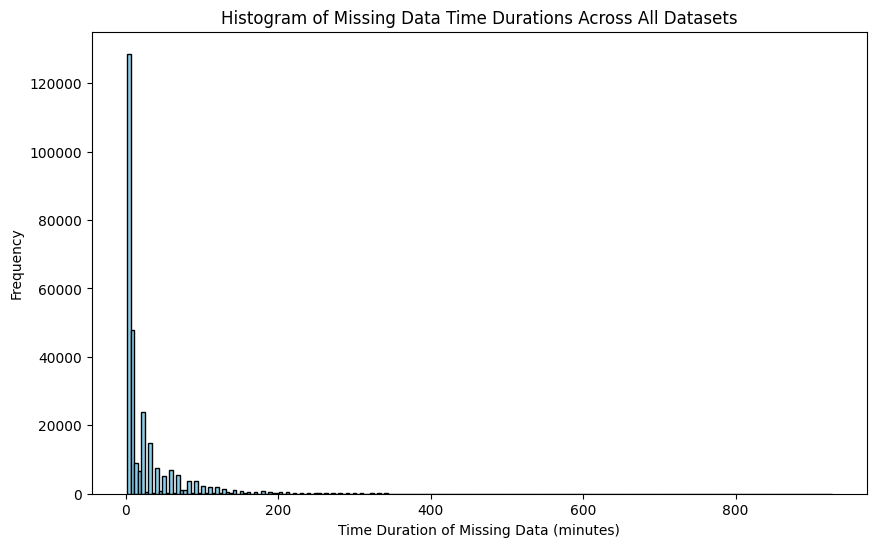

In [67]:
def plot_diffs():
    all_diffs = get_all_diffs()
    plt.figure(figsize=(10, 6))
    plt.hist(all_diffs, bins=200, color='skyblue', edgecolor='black')
    plt.xlabel("Time Duration of Missing Data (minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Missing Data Time Durations Across All Datasets")
    plt.show()

plot_diffs()

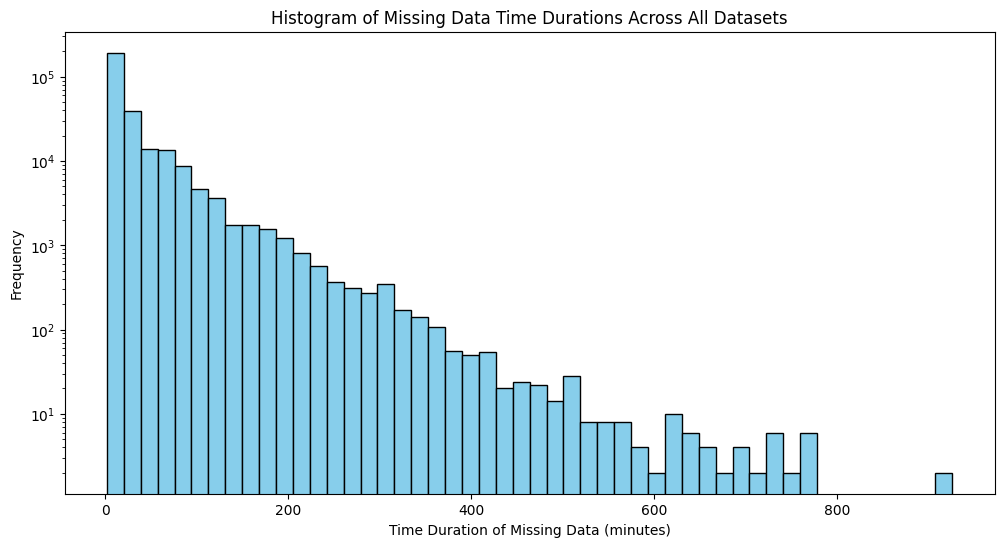

In [6]:
def plot_diffs_exponential():
    all_diffs = get_all_diffs()
    plt.figure(figsize=(12, 6))
    plt.yscale('log')
    plt.hist(all_diffs, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel("Time Duration of Missing Data (minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Missing Data Time Durations Across All Datasets")
    plt.show()

plot_diffs_exponential()